# [코드리뷰 프로젝트] 2. 2레이어 인공신경망 심화

## 0. 모델 세팅 & 포워딩 연산 구현하기

In [1]:
import numpy as np # numpy import
X = np.array([0, 0, 1, 1, 0, 1, 0, 1]).reshape(2,4) # 입력
Y = np.array([0, 1, 1, 0]).reshape(1,4) # 정답

print(X)
print(Y)

[[0 0 1 1]
 [0 1 0 1]]
[[0 1 1 0]]


In [21]:
# 가중치 초기화 함수
def init_parameters(num_hidden_units = 2):
  W1 = np.random.randn(2, num_hidden_units) # 첫번째 레이어 가중치
  B1 = np.zeros((num_hidden_units,1)) # 첫번째 레이어 바이어스
  W2 = np.random.randn(num_hidden_units, 1) # 두번째 레이어 가중치
  B2 = np.zeros((1, 1)) # 두번째 레이어의 바이어스
  return W1, B1, W2, B2 # 가중치 파라미터 리턴

#--------------------------------------------------------------------------------------------------------------------------------------
# Affine transform을 구현하세요.
def affine(W, X, B):
    return np.dot(W, X) + B

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

w = np.array([[1, 1], [2, 2]])
b = [[1],[2]]
x = [[1],[1]]

print(affine(w, x, b)) # affine test -> [[3],[6]]

print(sigmoid(0.1)) # sigmoide test -> 0.524979

[[3]
 [6]]
0.52497918747894


## 1. 손실함수 만들기


### [TODO] 1_ 이진 크로스 엔트로피 (Binary Cross Entropy)

In [25]:
def binary_cross_entropy(Y, YHat):
    N = Y.shape[1]  # 총 샘플의 수
    loss = -np.sum(Y * np.log(YHat) + (1 - Y) * np.log(1 - YHat)) / N
    return loss

In [26]:
def init_parameters(num_hidden_units):
    np.random.seed(42)  # 랜덤 시드 고정
    W1 = np.random.randn(num_hidden_units, 2)  # 입력 크기는 2로 가정
    B1 = np.random.randn(num_hidden_units, 1)
    W2 = np.random.randn(1, num_hidden_units)
    B2 = np.random.randn(1, 1)
    return W1, B1, W2, B2

## 2. 순방향(forward) 및 역방향(backward) 연산 구현하기

### [TODO] 2_ 2레이어 순방향 연산 함수 구현하기

In [30]:
#######################################
#### 3-2. 알맞은 코드를 직접 작성해보세요! ####
#######################################

def forward_loss(X, Y, _params):
    W1, B1, W2, B2 = _params

    # 첫번째 레이어연산
    Z1 = affine(W1, X, B1)    # 1) affine 함수
    H = sigmoid(Z1)           # 2) sigmoid 함수

    # 두번째 레이어 연산
    Z2 = affine(W2, H, B2)    # 3) affine 함수
    YHat = sigmoid(Z2)        # 4) sigmoid 함수

    # 손실함수 계산
    loss = binary_cross_entropy(Y, YHat)  # 5) 이진크로스 엔트로피 함수

    return Z1, H, Z2, YHat, loss

In [31]:
if __name__ == "__main__":
    # 테스트 값 초기화
    X = np.array([[0.5], [0.1]])
    Y = np.array([[1]])

    # 파라미터 초기화 (num_hidden_units = 2)
    W1, B1, W2, B2 = init_parameters(num_hidden_units=2)

    # 전방 계산 및 손실 계산
    Z1, H, Z2, YHat, loss = forward_loss(X, Y, [W1, B1, W2, B2])

    # 중간 결과 출력
    print("Z1:", Z1)
    print("H:", H)
    print("Z2:", Z2)
    print("YHat:", YHat)
    print("Loss:", loss)

Z1: [[0.00037727]
 [0.2420103 ]]
H: [[0.50009432]
 [0.560209  ]]
Z2: [[0.75020481]]
YHat: [[0.67922332]]
Loss: 0.3868053036181012


### [TODO] 5_ 2레이어 뉴럴네트워크의 역방향 연산 함수 구현하기

In [32]:
def get_gradients(X, Y, _params):
    W1, B1, W2, B2 = _params
    m = X.shape[1]  # 샘플의 수

    # Forward 함수 통과 후 출력
    Z1, H, Z2, YHat, loss = forward_loss(X, Y, _params)

    # 1) dLoss/dZ2 구현. 손실함수가 각 샘플 손실의 평균으로 계산되기 때문에 그대로 구현하였습니다.
    dLdZ2 = (1 / m) * (YHat - Y)  # 그림에서 1의 구현

    # 2) dLoss/dW2의 구현
    dLdW2 = np.dot(dLdZ2, H.T)  # 그림에서 2의 구현 (초록색 2번 참고)

    # 3) dLoss/dB2의 구현 - 샘플마다 gradient가 있음. 따라서 합쳐줘야 함.
    dLdB2 = np.sum(dLdZ2, axis=1, keepdims=True)  # 그림에서 3의 구현

    # 4) dLoss/dH의 구현
    dLdH = np.dot(W2.T, dLdZ2)  # 그림에서 4의 구현

    # 5) dLoss/dZ1의 구현
    dLdZ1 = dLdH * H * (1 - H)  # 그림에서 5의 구현 (초록색 5번 참고)

    # 6) dLoss/dW1의 구현
    dLdW1 = np.dot(dLdZ1, X.T)  # 그림에서 6의 구현

    # 7) dLoss/dB1의 구현
    dLdB1 = np.sum(dLdZ1, axis=1, keepdims=True)  # 그림에서 7의 구현

    return [dLdW1, dLdB1, dLdW2, dLdB2], loss


## 3. 모델 학습하기

In [33]:
def optimize (X, Y, _params, learning_rate = 0.1, iteration = 1000):

    params = np.copy(_params) # 파라미터 복사
    loss_trace = [] # 손실 값 저장

    for epoch in range(iteration): # 학습 반복
        dparams, loss = get_gradients(X, Y, params) # 그레디언트 추출
        for param, dparam in zip(params, dparams):
            param += - learning_rate * dparam # 경사하강법 구현

        if (epoch % 100 == 0): # 손실값 저장
            loss_trace.append(loss)

    _, _, _, Y_hat_predict, _ = forward_loss(X, Y, params) # 학습된 모델로 추론

    return params,loss_trace, Y_hat_predict

In [34]:
X = np.array([0, 0, 1, 1, 0, 1, 0, 1]).reshape(2,4) # 입력
Y = np.array([0, 1, 1, 0]).reshape(1,4) # 정답

params = init_parameters(2) # 파라미터 세팅
new_params, loss_trace, Y_hat_predict = optimize(X, Y, params, 0.1, 150000) # 학습 및 추론

print(Y_hat_predict) # 정답 Y와 유사한 값이 나왔다면 학습이 잘 진행된 것 입니다.

[[6.21620551e-04 4.99846111e-01 9.99591612e-01 5.00196568e-01]]


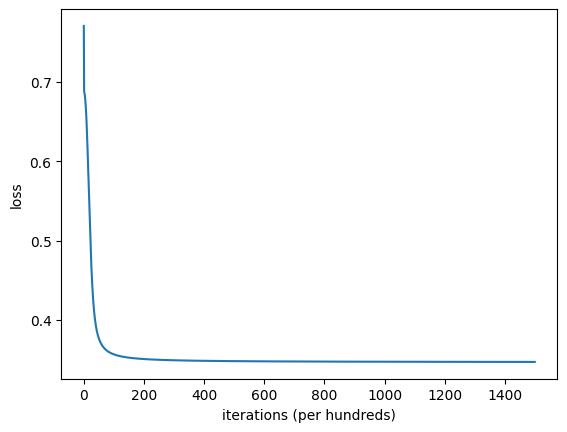

In [35]:
import matplotlib.pyplot as plt

# Plot learning curve (with costs)
plt.plot(loss_trace)
plt.ylabel('loss')
plt.xlabel('iterations (per hundreds)')
plt.show()

## 4. 코드리뷰 프로젝트 제출하기

- 수행한 프로젝트 내용을 확인하고, 전체 코드를 파이썬 파일(.py)로 저장합니다.
- 다운로드 받은 .py 파일을 zip으로 압축 및 제출하여 수행여부를 증빙합니다.
- 이번 차시에 궁금한 점이 있다면, 본문에 내용을 함께 작성하여 제출할 수 있습니다.

ALL RIGHTS RESERVED. (C)NAVER Connect Foundation.